In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import time, timeit

from procedure_notebook import Procedure, Hamiltonian
import measurables

In [2]:
proc = Procedure()

proc.setParameters(L = 4, J = 1, hx=0.2)

eigenenergies, eigenstates = measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters).eigenstates()


ground_energy = eigenenergies[0]
ground_states = []
for i in range(len(eigenenergies)):
    if np.round(eigenenergies[i], 8) == np.round(ground_energy, 8):
        eigenstates[i] = eigenstates[i].ptrace([i for i in range(proc.L)])
        ground_states.append(eigenstates[i] * eigenstates[i].dag())
    else:
        break 


def measure(state, proc):

    energy = qt.expect(measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters), state)
    state = state.ptrace([i for i in range(proc.L)])
    
    product = 0
    for gstate in ground_states:
        product += Procedure.abs_squared_scalarproduct(state, gstate)

    return [energy, product]
    

N_cycles = 30

In [44]:
ideal = proc.runProcedure(N_cycles, measure, chain_hamiltonian=measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters), 
                        setup_state_for_next_cycle=Procedure.pass_full_density_matrix, using_density_matrices=True)

xz = proc.runProcedure(N_cycles, measure, chain_hamiltonian=measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters), 
                        setup_state_for_next_cycle=Procedure.pass_remake_product_state_with_xz, using_state_vectors=True)

xyz = proc.runProcedure(N_cycles, measure, chain_hamiltonian=measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters), 
                        setup_state_for_next_cycle=Procedure.pass_remake_product_state_with_xyz, using_state_vectors=True)

True


Cycle:   0%|          | 0/30 [00:00<?, ?it/s]

mesolve:   0%|          | 0/500 [00:00<?, ?it/s]

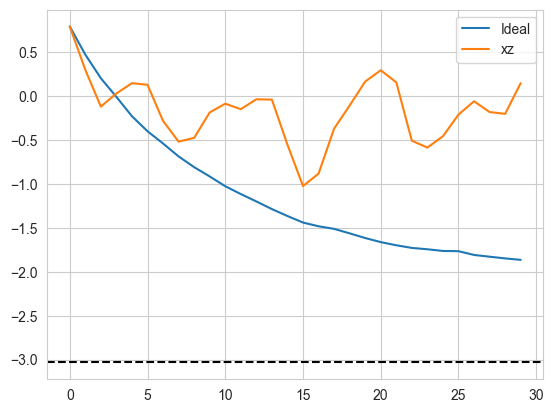

In [31]:
plt.plot(ideal[0,:,-1], label = "Ideal")
plt.plot(xz[0,:,-1], label = "xz")
plt.plot(xyz[0,:,-1], label = "xz")
plt.axhline(y=measurables.tfim_hamiltonian(proc.L, proc.tfim_parameters).eigenenergies()[0], color = "black", linestyle = "dashed", label = "Ground energy")
plt.xlabel("Cycle")
plt.ylabel("Energy")
plt.legend()
plt.show()


In [ ]:
plt.plot(ideal[1,:,-1], label = "Ideal")
plt.plot(xz[1,:,-1], label = "xz")
plt.plot(xyz[1,:,-1], label = "xz")
plt.xlabel("Cycle")
plt.ylabel("Ground state projection")
plt.legend()
plt.show()